In [3]:
%pip install gurobipy
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [4]:
rnd = np.random
rnd.seed(50)

In [5]:
n = 25  # numbre of clients
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100

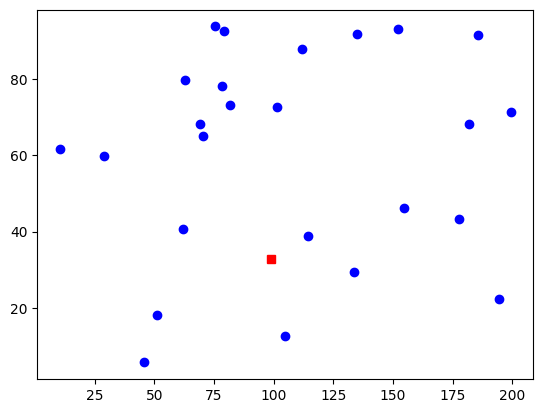

In [6]:
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

In [7]:
N = [i for i in range(1, n+1)] #Number of nodes/locations
V = [0] + N                    #Set of vertices
A = [(i, j) for i in V for j in V if i != j] #every possible combination of i and j
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A} #Calculating cost values
Q = 25                #Max capacity
q = {i: rnd.randint(1, 10) for i in N} #Alloting random values for demand to be fulfilled


In [8]:
from gurobipy import Model, GRB, quicksum
sum=0
for (i, j), value in c.items():
    if i == 0:
        sum += value
print(sum)

1540.8800943313


In [9]:
mdl = Model('CVRP')

Restricted license - for non-production use only - expires 2024-10-28


In [10]:
x = mdl.addVars(A, vtype=GRB.BINARY)
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)

In [11]:
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i, j]*c[i, j] for i, j in A))

In [12]:
mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.addConstrs((x[i, j] == 1) >> (u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)
mdl.addConstrs(u[i] >= q[i] for i in N)
mdl.addConstrs(u[i] <= Q for i in N)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>,
 22: <gurobi.Constr *Awaiting Model Update*

In [13]:
mdl.Params.MIPGap = 0.1
mdl.Params.TimeLimit = 200  # seconds
mdl.optimize()

Set parameter MIPGap to value 0.1
Set parameter TimeLimit to value 200
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6500U CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 100 rows, 675 columns and 1300 nonzeros
Model fingerprint: 0xf4c6b0a8
Model has 600 general constraints
Variable types: 25 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
  GenCon rhs range [1e+00, 9e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 1338 rows and 244 columns
Presolve time: 0.10s
Presolved: 1438 rows, 919 columns, 8993 nonzeros
Variable types: 269 continuous, 650 integer (650 binary)
Found heuristic solution: objective 3081.7601887

Root relaxation: objective 5.336020e+02, 110 iterations, 0.01 seconds (0.00 work 

[(0, 1), (0, 6), (0, 9), (0, 14), (0, 16), (0, 21), (1, 2), (2, 10), (3, 19), (4, 3), (5, 13), (6, 20), (7, 0), (8, 0), (9, 25), (10, 11), (11, 0), (12, 0), (13, 17), (14, 22), (15, 18), (16, 4), (17, 0), (18, 8), (19, 23), (20, 15), (21, 24), (22, 5), (23, 0), (24, 7), (25, 12)]


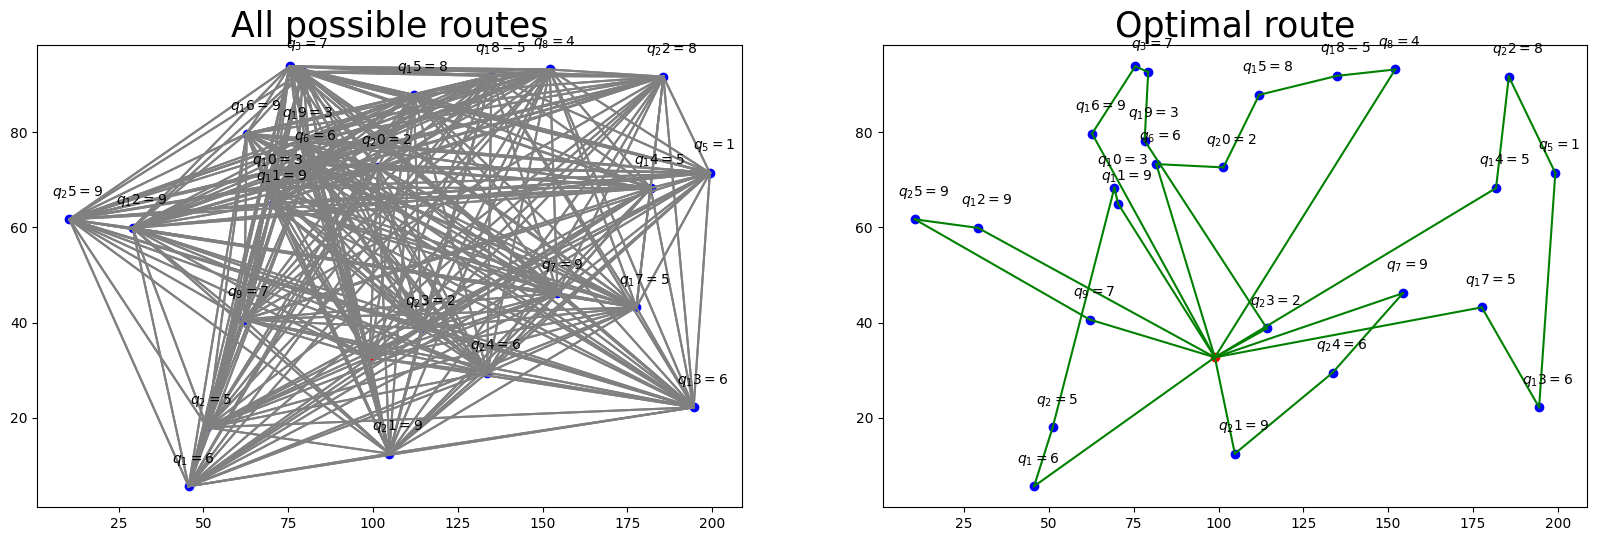

6


In [14]:
# optimal path -  active paths
active_arcs = [a for a in A if x[a].x > 0.9]
print(active_arcs)
# Visualize / Plotting
f, (ax1,ax2) = plt.subplots(1,2, figsize = (20, 6))
# all possible paths - ax1
ax1.scatter(xc[1:], yc[1:], c = 'b')
ax1.scatter(xc[0], yc[0], c='r')
ax1.set_title('All possible routes', fontsize = 25)

for i in N:
    ax1.annotate('$q_%d = %d$' % (i,q[i]), (xc[i]-5, yc[i]+5))
for i,j in A:
    ax1.plot([xc[i],xc[j]], [yc[i], yc[j]], c = 'grey')
    
# Optimal path - ax2
ax2.scatter(xc[1:], yc[1:], c = 'b')
ax2.scatter(xc[0], yc[0], c='r')
ax2.set_title('Optimal route', fontsize = 25)

number_of_vehicles = 0
for i in N:
    ax2.annotate('$q_%d = %d$' % (i,q[i]), (xc[i]-5, yc[i]+5))
for i,j in active_arcs:
    if(i==0):
        number_of_vehicles+=1
    ax2.plot([xc[i],xc[j]], [yc[i], yc[j]], c = 'g')
plt.show()
print(number_of_vehicles)

In [15]:
def CVRP():
    
    Q = int(input('Enter capacity of vehicles = ') or 15)
    mdl = Model('CVRP')
    x = mdl.addVars(A, vtype=GRB.BINARY)
    u = mdl.addVars(N, vtype=GRB.CONTINUOUS)
    mdl.modelSense = GRB.MINIMIZE
    mdl.setObjective(quicksum(x[i, j]*c[i, j] for i, j in A))

    mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
    mdl.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)
    mdl.addConstrs((x[i, j] == 1) >> (u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)
    mdl.addConstrs(u[i] >= q[i] for i in N)
    mdl.addConstrs(u[i] <= Q for i in N)

    mdl.Params.MIPGap = 0.05
    mdl.Params.TimeLimit = 100  # seconds
    mdl.optimize()
    # optimal path -  active paths
    active_arcs = [a for a in A if x[a].x > 0.99]

    plt.scatter(xc[1:], yc[1:], c = 'b')
    plt.scatter(xc[0], yc[0], c='r')
    plt.title('Optimal route with %s as max weight'%Q, fontsize = 20)
    
    number_of_vehicles=0
    for i in N:
        plt.annotate('$q_%d = %d$' % (i,q[i]), (xc[i]-5, yc[i]+5))
    for i,j in active_arcs:
        if(i==0):
            number_of_vehicles+=1
        plt.plot([xc[i],xc[j]], [yc[i], yc[j]], c = 'g')
    plt.show()
    print(number_of_vehicles)

Set parameter MIPGap to value 0.05
Set parameter TimeLimit to value 100
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6500U CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 100 rows, 675 columns and 1300 nonzeros
Model fingerprint: 0x185a06d9
Model has 600 general constraints
Variable types: 25 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
  GenCon rhs range [1e+00, 9e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 1072 rows and 105 columns
Presolve time: 0.09s
Presolved: 1172 rows, 780 columns, 7527 nonzeros
Variable types: 210 continuous, 570 integer (570 binary)
Found heuristic solution: objective 3081.7601887

Root relaxation: objective 7.126277e+02, 203 iterations, 0.01 seconds (0.01 work

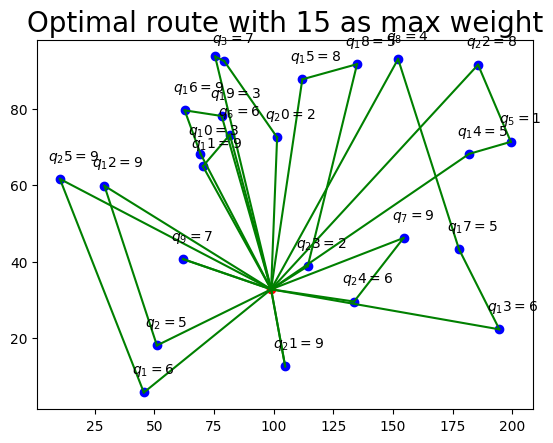

11


In [16]:
CVRP()

Set parameter MIPGap to value 0.05
Set parameter TimeLimit to value 100
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6500U CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 100 rows, 675 columns and 1300 nonzeros
Model fingerprint: 0x185a06d9
Model has 600 general constraints
Variable types: 25 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
  GenCon rhs range [1e+00, 9e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 1072 rows and 105 columns
Presolve time: 0.18s
Presolved: 1172 rows, 780 columns, 7527 nonzeros
Variable types: 210 continuous, 570 integer (570 binary)
Found heuristic solution: objective 3081.7601887

Root relaxation: objective 7.126277e+02, 203 iterations, 0.01 seconds (0.01 work

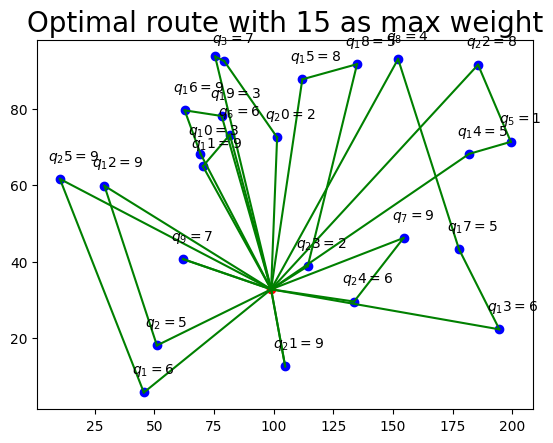

11


In [17]:
CVRP()